In [1]:
from dreye.core import Spectrum, SpectrumMeasurement, \
    MeasuredSpectrum, convert_measurement, CalibrationSpectrum, \
    AbstractSpectrum, Signal, Domain
from dreye.constants import UREG
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
np.random.seed(10)

In [2]:
from dreye.core import create_gaussian_spectrum

In [3]:
from dreye.core import create_spectrum_measurement, create_measured_spectrum

In [4]:
from dreye.utilities import is_listlike

In [5]:
wl = np.arange(300, 600)
s = norm.pdf(wl, 450, 10)
s /= np.sum(s)
noise = 0.01
s_noise = s + np.random.normal(0, noise, size=s.shape)

wl is a numpy array of the desired wavelengths
s is a gaussian distribution 
s_noise is a noisy version of the signal- if you are simulating measurements, you will simulate them with noise, so adding noise will basically simulate the imperfect measurements from the LEDs

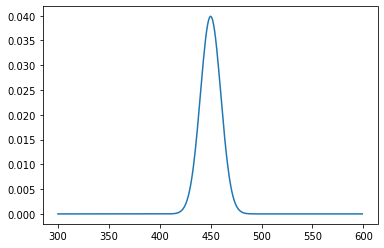

In [8]:
plt.plot(wl, s)

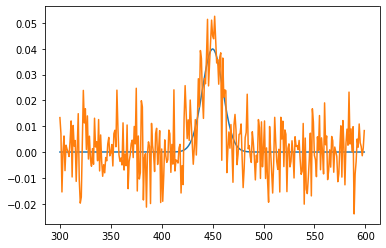

In [7]:
plt.plot(wl, s)
plt.plot(wl, s_noise)

In [24]:
gaussians = create_gaussian_spectrum(
    wl, 
    [340, 440, 540], 
    intensity=0.5, 
    background=np.ones(wl.shape), 
    add_background=True, 
    cdf=False, 
    filter=True,
)

Convenience function to create a bunch of gaussian spectra- could be for simulating LEDs, creating single wavelegnth stimuli, opsin sensitivities, etc- anything that needs a gaussian spectrum. 

MAKE A NEW NOTEBOOK JUST FOR THIS- centers = centers of dist, units- spectral photon flux and spectral irradiance ( can specify micro / nano, cdf-true means instead of plotting pdf it has cdf of those gaussians none= pdf, false plots 1-cdf, background = can pass numpy array of same length as wavelengths to add that background OR you can filter by that background instead of using them as pure spectral distributions, zero_cutoff= cuts off spectral distribution at 0 if there are negative values 

In [86]:
create_gaussian_spectrum?

/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


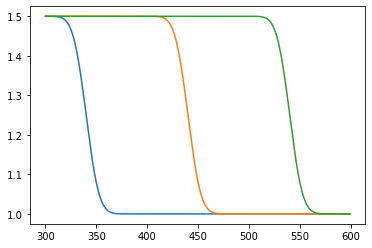

In [9]:
plt.plot(
    gaussians.domain, gaussians, 
)

These gaussians are an instance of a class in the dreye package (here it is an arbitrary signals), here you see three signals, each are a low pass signal filtering out high frequencies. just to show how the convenience function works- doesnt have to be part of the tutorial itself. we can save the data and load it up in the tutorial as data- this is just dummy data 

In [10]:
s2 = norm.pdf(wl[:, None], [300, 400, 500], 10)

In [11]:
s2.shape

(300, 3)

In [12]:
np.arange(100).reshape(10, 10).mean(0)[None]

array([[45., 46., 47., 48., 49., 50., 51., 52., 53., 54.]])

In [13]:
cal = CalibrationSpectrum(
    np.ones(wl.shape), 
    wl, 
    area=1
)

Cal- you can load up a calibration spectrum as a dummy calibration like a flat spectral distribution- now you can create a measurement 

In [14]:
float(asarray([1]))

1.0

In [15]:
meas3 = create_measured_spectrum(
    np.arange(1, 10)[None, :] * norm.pdf(wl, 400, 10)[:, None], 
    np.arange(1, 10), 
    wl, 
    calibration=cal, 
    integration_time=1, 
)

This creates a measurement spectrum- allows you to hold one measurement across different voltages. you can pass this through the photoreceptor class to do fittings, etc. This is for testing - this notebook tells you how to fit 

In [16]:
signal = AbstractSpectrum(
    s_noise, wl
)

In [17]:
measurement2 = convert_measurement(
    AbstractSpectrum(
        s, wl
    ), cal, 1
).uE

for i in np.arange(2, 10):
    m = convert_measurement(
        AbstractSpectrum(
            i * s, 
            wl
        ),
        cal, 1
    ).irradiance
    
    measurement2 = measurement2.concat(
        m, 
    )

/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


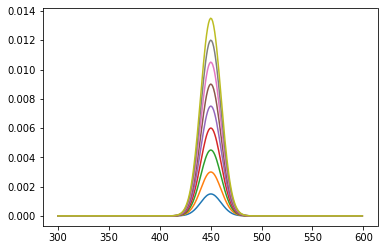

In [18]:
plt.plot(measurement2.domain, measurement2)

In [19]:
measurement = convert_measurement(
    signal, cal, 1
).uE

for i in np.arange(2, 10):
    m = convert_measurement(
        AbstractSpectrum(
            i * s + np.random.normal(0, noise, size=s.shape), 
            wl
        ),
        cal, 1
    ).irradiance
    
    measurement = measurement.concat(
        m, 
    )

/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


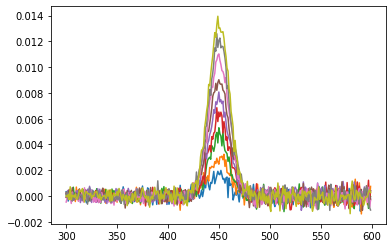

In [20]:
plt.plot(measurement.domain, measurement)

In [21]:
measured_spectrum = MeasuredSpectrum(
    measurement,
    labels=Domain(np.arange(1, 10), units='volts'), 
    smoothing_window=25, 
)

In [22]:
measured_spectrum2 = MeasuredSpectrum(
    measurement2,
    labels=Domain(np.arange(1, 10), units='volts'), 
    smoothing_window=25, 
)

In [25]:
spm = measured_spectrum.to_spectrum_measurement(
    name='LED',
    zero_boundary=0, 
    zero_is_lower=True
)

print(spm.interpolator_kwargs)
print(spm)
print(spm.domain)

y_points = [0, 0.06, 0.1, 0.2]
x_points = spm.map(y_points)

{'bounds_error': False, 'fill_value': 'extrapolate', 'axis': 0}
[0.04120455 0.07192294 0.10227126 0.15538395 0.19004821 0.21804994 0.25703302 0.29903963 0.33008348] microE_Q
Domain(start=1.0, end=9.0, interval=1.0, units=volt, dtype=float64)


In [26]:
x_points

array([[0.        , 1.61186306, 2.92516022, 5.35539909]]) <Unit('volt')>

In [27]:
spm.domain_bounds

array([0., 9.])

In [28]:
msp = measured_spectrum.smooth

/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


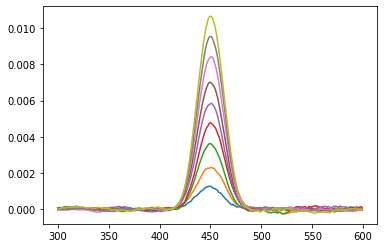

In [29]:
plt.plot(msp.domain, msp)


In [32]:
spm2 = msp.to_spectrum_measurement(
    name='LED',
    zero_boundary=0, 
    zero_is_lower=True
)

x_points2 = spm2.map(y_points)

In [33]:
spm2.zero_boundary

array([0])

In [34]:
spm3 = measured_spectrum2.to_spectrum_measurement(
    name='LED',
    zero_boundary=0, 
    zero_is_lower=True
)
x_points3 = spm3.map(y_points)

/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)
/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)
/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)
/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


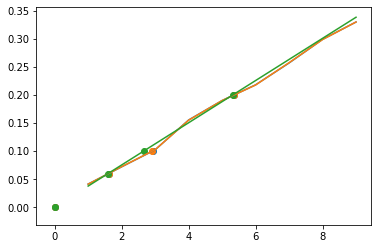

In [35]:
plt.scatter(x_points, y_points)
plt.plot(spm.domain, spm)
plt.scatter(x_points2, y_points)
plt.plot(spm2.domain, spm2)
plt.scatter(x_points3, y_points)
plt.plot(spm3.domain, spm3)

In [37]:
for idx, led in enumerate([300, 360, 400, 500]):
    
    s2 = norm.pdf(wl, led, 20)
    mess = convert_measurement(
        AbstractSpectrum(
            s2 + np.random.normal(0, noise, size=s.shape), 
            wl
        ), cal, 1
    ).uE

    for i in np.arange(2, 10):
        m = convert_measurement(
            AbstractSpectrum(
                i * s2 + np.random.normal(0, noise, size=s.shape), 
                wl
            ),
            cal, 1
        ).irradiance

        mess = mess.concat(
            m, 
        )

    ms = MeasuredSpectrum(
        mess,
        labels=Domain(np.arange(1, 10), units='volts'), 
        smoothing_window=25, 
    ).to_spectrum_measurement(
        name=f'LED{led}', 
        zero_boundary=0, 
        zero_is_lower=True
    )
        
    if idx == 0:
        mss = ms
    else:
        mss = mss.concat(ms)

In [38]:
mss.shape

(9, 4)

/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


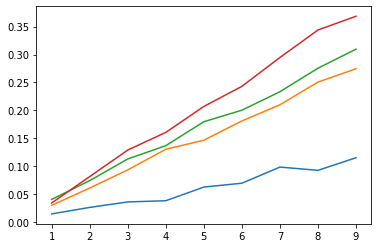

In [39]:
plt.plot(mss.domain, mss)

In [40]:
from dreye.core import LogPhotoreceptor, \
    RelativeOpsinSensitivity, Spectrum, Domain
from scipy.stats import norm

fitting arbitrary spectral distributions to PRs. Gonna have one notebook to run through dummy measurements (testAO) so you can test without hardware. and one would be fitting and how the fitting works 

Dummy AO measurement 
FITTING STARTS HERE ^
-there can be multiple notebooks for this 

In [41]:
wl = np.arange(300, 600)
ops = norm.pdf(wl, 433, 40)

In [42]:
opsin = RelativeOpsinSensitivity(
    ops, 
    domain=wl, 
)

In [43]:
pr = LogPhotoreceptor(opsin)



/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


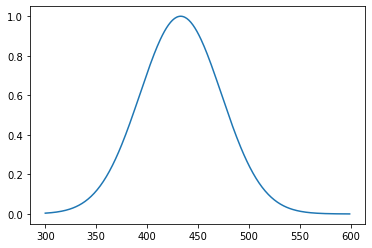

In [44]:
plt.plot(opsin.domain, opsin)

In [45]:
ill = norm.pdf(wl, 400, 80)
bg = np.ones(wl.shape)
bg /= np.sum(bg) * 100

In [46]:
illuminant = Spectrum(
    ill, 
    domain=wl
).uE
background = Spectrum(
    bg, 
    domain=wl
).uE

In [47]:
background.integral, illuminant.integral

(0.037450014891065905 <Unit('microspectral_E_Q * nanometer')>,
 3.079007145242771 <Unit('microspectral_E_Q * nanometer')>)

In [48]:
targets, A = pr.get_qs(
    mss, 
    illuminant/20, 
    background=background, 
)

In [49]:
bg_weights, bg_res, bg_new = mss.fit(
    background, return_fit=True, return_res=True
)

In [50]:
bg_weights

array([0.00227686, 0.0042431 , 0.00682931, 0.00949245]) <Unit('microE_Q')>

/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)
/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


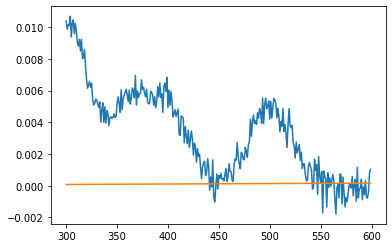

In [51]:
plt.plot(bg_new.domain, bg_new)
plt.plot(background.domain, background)

In [52]:
print(A)

[[-4.56136051e-03  2.02692683e+01  5.60558505e+01  2.31543996e+01]] / microspectral_E_Q / nanometer


In [55]:
w, res = pr.fit(
    mss, 
    illuminant/10 +  background, 
    background=background, 
    return_res=True, 
    only_uniques=False
)

In [56]:
res

array([ active_mask: array([0, 0, 0, 0])
        cost: 0.0
         fun: array([0.])
        grad: array([0., 0., 0., 0.])
         jac: array([[-3.42637300e-04,  1.52261484e+00,  4.21088055e+00,
         1.73934409e+00]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 1
        njev: 1
  optimality: 0.0
      status: 1
     success: True
           x: array([0.10133704, 0.09135914, 0.1667169 , 0.09135914])],
      dtype=object)

In [57]:
w.shape

(1, 4)

In [58]:
mss.units

<Unit('microE_Q')>

In [59]:
print(w)

[[0.10133704 0.09135914 0.1667169  0.09135914]] microspectral_E_Q * nanometer


In [60]:
mss.bounds

[array([0., 0., 0., 0.]),
 array([0.11547341, 0.27457168, 0.30958498, 0.36842879])]

In [61]:
map_values = np.random.random(
    (100, mss.shape[mss.other_axis])
) * mss.bounds[1][None, :]

In [62]:
mapped = mss.map(map_values, method='isotonic')

/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)
/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)
/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


In [63]:
xmss = mss.map(w, top=10)
print(xmss)

/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)
/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)
/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)
/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


[[8.28123079 2.926938   4.69374882 2.20297008]] volt


In [64]:
mss_smooth = mss.window_filter(
    3, 'savgol', polyorder=2
)
type(mss_smooth)

/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


dreye.core.spectral_measurement.SpectrumMeasurement

In [65]:
xmss2 = mss_smooth.map(w)
print(xmss2)

/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)
/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


[[8.28123079 2.926938   4.69374882 2.20297008]] volt


/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


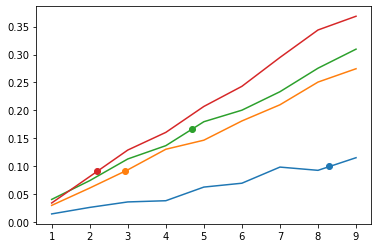

In [66]:
plt.plot(mss.domain, mss)

for ixms, iw in zip(np.squeeze(xmss), np.squeeze(w)):
    plt.scatter(
        ixms, iw, 
    )

/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


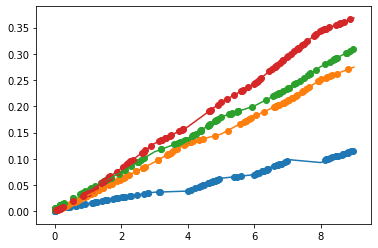

In [67]:
plt.plot(mss.domain, mss)

for ixms, iw in zip(mapped.T, map_values.T):
    plt.scatter(
        ixms, iw, 
    )

In [68]:
mss.bounds

[array([0., 0., 0., 0.]),
 array([0.11547341, 0.27457168, 0.30958498, 0.36842879])]

In [69]:
mss.domain_bounds

array([[0., 9.],
       [0., 9.],
       [0., 9.],
       [0., 9.]])

In [70]:
opsin2 = RelativeOpsinSensitivity(
    norm.pdf(wl[:,None], asarray([[330, 450, 560]]), 40),
    domain=wl, 
)

In [71]:
pr = LogPhotoreceptor(opsin2)



In [72]:
ill2 = Spectrum(
    norm.pdf(wl[:,None], asarray([[360, 480, 530, 320]]), 10), 
    domain=wl, 
    units='microspectralphotonflux'
)

/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


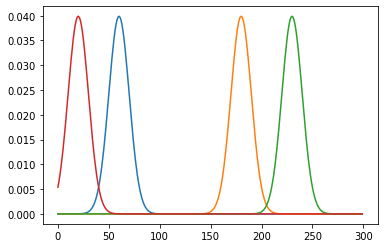

In [73]:
plt.plot(ill2)
#plt.plot(opsin2)

/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


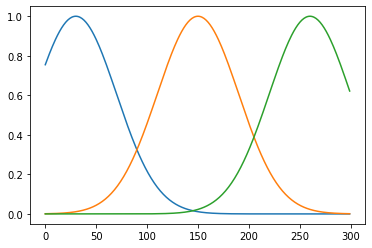

In [74]:
plt.plot(opsin2)

/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


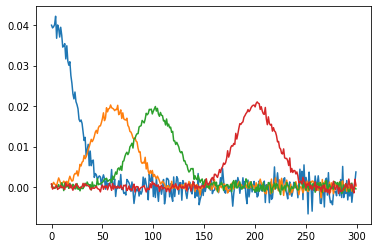

In [75]:
plt.plot(mss.normalized_spectrum)

In [76]:
w, res = pr.fit(
    mss, 
    ill2/20 +  background, 
    background=background, 
    return_res=True, 
)

In [77]:
print(w)
w.shape

[[4.65519959e-02 3.88298719e-04 3.29707558e-04 3.74339506e-02] [9.15445773e-11 1.72752298e-10 3.04973365e-02 5.93538274e-02] [7.69070374e-03 2.08004929e-11 2.56275318e-12 7.62877217e-02] [5.60162899e-02 1.06963098e-10 4.93004308e-11 3.36318799e-02]] microspectral_E_Q * nanometer


(4, 4)

In [78]:
res[1].fun

array([ 0.05334362, -0.15580718,  0.10247256])

In [79]:
targets, A = pr.get_qs(
    mss, 
    ill2 +  background,  
    background=background, 
)

In [80]:
targets

array([[100.71246787,   8.12625667,   1.00058968],
       [  1.17366095,  60.23029457,  12.54695895],
       [  1.0010101 ,  12.74921095,  59.21069884],
       [125.02076161,   1.53437558,   1.00000333]]) <Unit('dimensionless')>

In [81]:
print(A)

[[127.3655767   92.75751851  34.41158307   0.24411533] [ -1.16551234  10.316136    38.691814    37.23376806] [ -1.83011334   0.44762388   0.90541845  28.97777449]] / microspectral_E_Q / nanometer


In [82]:
xmss = mss.map(w)

/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)
/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)
/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


/anaconda/envs/dreye/lib/python3.7/site-packages/pint/quantity.py:1377: UnitStrippedWarning: The unit of the quantity is stripped.
  warnings.warn("The unit of the quantity is stripped.", UnitStrippedWarning)


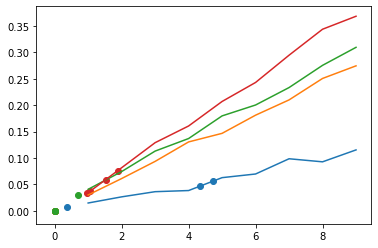

In [83]:
plt.plot(mss.domain, mss)

for ixms, iw in zip(np.squeeze(xmss.T), np.squeeze(w.T)):
    plt.scatter(
        ixms, iw, 
    )